# Lab 5: High-dimensional Gradient Descent

In this exercise, you will learn the following

* how to define a probability density function 
* how to fit a Gaussian model using maximum likelihood estimation
* how to define a loss function via log likelihood
* how to produce scatter and line plots using Matplotlib 
* how to train a Gaussian model using high-dimensional gradient descent/ascent
* how to use pytorch for automated gradient descent/ascent 

To solve the exercise, you need to fill in some code below. Suggested solutions will be posted on Canvas later.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Define probability density function and visualise data

First, you need to load the dataset from the last tutoral, which contains 100000 independant observations sampled from a normal distribution 

In [ ]:
url = "http://www.cs.bham.ac.uk/~duanj/log/Gaussian_Distrbution/Gaussian_100000.csv"
data = np.genfromtxt(url, delimiter=",", skip_header=0, usecols=(0))

As we know our `data` above was sampled from a normal distribution, if we plot its histogram we will be able to see such a distribution visually.  

Text(0, 0.5, 'No of times')

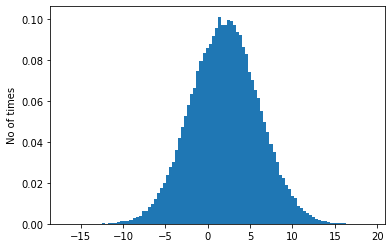

In [ ]:
plt.hist(data, 100, density=True)
plt.ylabel('No of times')

On top of the `data` and its histogram, we want to fit a Guassian-like curve. To do so, we will need to define the probability density function of a Guassian distribution. Below please write such probability density function with `mean` and `std` being model parameters and `x` representing the observations from the distribution

In [ ]:
def prob_density_func(x, mean, std):
    return 1.0/np.sqrt(2*np.pi*std**2)*np.exp(-0.5*(x-mean)**2/std**2)

Let's try to fit a curve using the `prob_density_func` you defined above. 

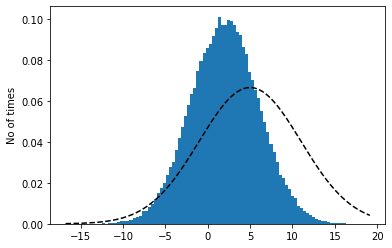

In [ ]:
data_regrid = np.linspace(np.min(data),np.max(data), data.shape[0])
mean, std = 5, 6
pdf = prob_density_func(data_regrid, mean, std)

plt.hist(data, 100, density=True)
plt.ylabel('No of times')
plt.plot(data_regrid, pdf, 'k--')
plt.show()


Ops! You can see the curve is not fitting the data very well. Please write down in the following your code which gives the correct fitting. Hint: using the maximum likelihood estimation results from the last lab tutorial. 

## Defining a loss function

As shown above, you can derive the explicit solutions with respect to the model parameters `mean` and `std`. However, this is not always the case for most deep learning models. Another way to compute a curve that can fit the data very well is to use gradinet descent/ascent. To do so, we need two functions that defines the loss function and its gradients. 

From the last tutorial, we know that for a normal distribution the loss function is essentially the log likelihood of a joint probablity density function. Below please write down your code to define such loss function

In [ ]:
def log_likelihood(data, mean, std):      
    return np.sum(np.log(prob_density_func(data, mean, std)))

To apply gradinet descent/ascent to iteratively optimise the model parameters `mean` and `std`, we need to calculate the derivatives (ie. gradients) with respect to the parameters. Below please write down your code to implement `gradient`. 

In [ ]:
def gradient(data, mean, std):
    dl_dmean = np.sum( (data - mean) / std**2 )
    dl_dstd  = np.sum( -1/std + (data - mean)**2 / std**3)
    return dl_dmean, dl_dstd

We now want to visualise the landscape of the loss function. The idea is to create two 2D meshgrids, which respectively represent discrete values of mean and standard deviation. These values are then passed to the `log_likelihood` to compute the loss on a 2D meshgrid. Pleas write down your code in the place indicated by #

done the loop


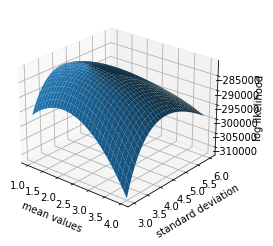

In [ ]:
mean_1D_grid = np.arange(1.0, 4.1, 0.1)
std_1D_grid = np.arange(3.0, 6.1, 0.1)

mean_2D_grid, std_2D_grid = np.meshgrid(mean_1D_grid, std_1D_grid)

row = mean_1D_grid.shape[0]
col = std_1D_grid.shape[0]

loss_2D_grid = np.zeros([row, col])

# write down your code here. Hint: you should use nested loops
for i in range(row):
    for j in range(col):
        loss_2D_grid[i,j] = log_likelihood(data, mean_2D_grid[i,j], std_2D_grid[i,j]) 
        
print('done the loop')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(10)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(mean_2D_grid, std_2D_grid, loss_2D_grid)

ax.set_xlabel('mean values')
ax.set_ylabel('standard deviation')
ax.set_zlabel('log likelihood')
ax.view_init(25, -50)

fig.canvas.draw()

## High-dimensional gradient descent/ascent

In this final section, we are going to use the gradient descend/ascent method to find the model parameters `mean` and `std`. In gradient descent/ascent, we usually work with an update scheme for the parameters using a small learning rate $\epsilon$. The update rule can be defined as follows

$$ [mean, std] \leftarrow [mean, std] - \epsilon \times  gradient$$

Here we use a learning rate $\epsilon = 0.00002$ and initial parameters $mean=4$ and $std=6$. A for-loop will iteratively update the value of parameters (see the body of the for-loop). After each update, the new value of parameters will be plotted, and over time, it shows clearly how the parameters is updated until coverging to the global optimum. 

Complete the code below so that the parameters `mean` and `std` is updated via gradient descent/ascent.

<IPython.core.display.Javascript object>


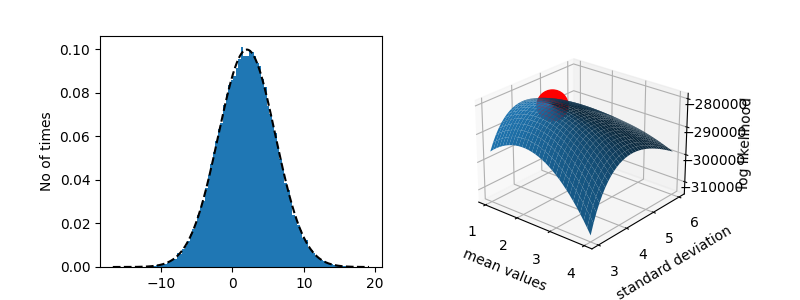

gradient ascent mean 2.020211176902342
gradient ascent std 3.9947762980622357
ground truth mean 2.02020308037172
ground truth std 3.994776297943574


In [ ]:
%matplotlib notebook

import time

# set up the canvas
fig = plt.figure(figsize=(8,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection='3d')

plt.ion()
fig.show()
fig.canvas.draw()

# set learning rate
epsilon = 0.00002

# Initial mean and std
mean_, std_ = 4, 6
parameters = np.array([mean_, std_])

for i in range(1, 100):   
    
    dl_dmean, dl_dstd = gradient(data, parameters[0], parameters[1])
    parameters = parameters + epsilon * np.array([dl_dmean, dl_dstd])
        
    ax1.clear()
    ax1.hist(data, 100, density=True)
    ax1.set_ylabel('No of times')
    data_regrid = np.linspace(np.min(data),np.max(data), data.shape[0])
    pdf = prob_density_func(data_regrid, parameters[0], parameters[1])
    ax1.plot(data_regrid, pdf, 'k--')
    
    ax2.clear()
    ax2.view_init(25, -50)
    ax2.plot_surface(mean_2D_grid, std_2D_grid, loss_2D_grid)
    
    ax2.scatter3D(parameters[0], parameters[1], log_likelihood(data, parameters[0], parameters[1]), s=500, color="r")
    ax2.set_xlabel('mean values')
    ax2.set_ylabel('standard deviation')
    ax2.set_zlabel('log likelihood')
        
    fig.canvas.draw()
    time.sleep(0.01)
    
    
print('gradient ascent mean {}'.format(parameters[0]))
print('gradient ascent std {}'.format(parameters[1]))
    
print('ground truth mean {}'.format(np.mean(data)))
print('ground truth std {}'.format(np.std(data)))    

## Introduction of pytorch

So far, we have walked you through a 1D gradient descent case (ie. linear regression) and a high-dimensional 2D gradient descent case (ie. Gaussian curve fitting). It is now the time to introduce you [`pytorch`](https://pytorch.org/features/), which allows implementations of modern, powerful deep learning neural networks in a very simple yet efficient way. 

The question naturally raises as to what pytorch is? The answers to this are summerised as the following 

`Pytorch` is a python-based scientific computing package targeted at two sets of audiences:

* A replacement for NumPy to use the power of GPUs
* A deep learning research platform that provides maximum flexibility and speed

As a start point, we ask you to quickly go through the tutorial from [here](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py) about some basic usage of pytorch.  

In addition to the use of GPUs, another very important feature about `pytorch` is *Automatic Differentiation*, which allows to numerically evaluate the derivative of a function/model specified by a computer program without any manual gradient calculations. That is to say we do not need something like `def gradient(data, mean, std)` defined above anymore. For a more detailed introduction of *Automatic Differentiation* in pytorch, please read [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py).

In what follows, we will leverage the power of *Automatic Differentiation*. We will cover how to use GPUs using pytorch in later tutorials. As pytorch has been installed for our module, we can directly use it. 


In [ ]:
%reset
import torch # pytorch
import torch.nn as nn
import torch.optim as optim
import numpy as np

Let's first import necessary pytorch libraries, which are `torch`, `torch.nn` and `torch optim`. These packages are explained as follows:

* `torch`: a general purpose array library similar to Numpy that can do computations on GPUs when the tensor type is cast to (torch.cuda.TensorFloat)

* `torch.nn`: a neural net library with common layers and cost functions
* `torch.optim`: an optimisation package with common optimisation algorithms like SGD,Adam, etc

The following describes a straightforward framework that reflects the coding structure of almost all other deep learning methods. You should get yourself really familiar with the framework. Its main building blocks (their orders may change) includes:

* define a model 
* choose a optimiser
* define a loss function 
* load data 
* train the model parameters to minimise the loss

Let's walk through each of steps above individually. 

In [ ]:
# define a model class
class prob_density_func(nn.Module):
    def __init__(self, mean=1, std=1):
        super(prob_density_func, self).__init__()
       
        self.mean = torch.nn.Parameter(torch.Tensor([mean]))  
        self.std = torch.nn.Parameter(torch.Tensor([std]))
    
    def forward(self, x):
        return 1.0/torch.sqrt(2*np.pi*self.std**2)*torch.exp(-0.5*(x-self.mean)**2/self.std**2)
    
    def extra_repr(self):
        return self.mean.item(), self.std.item()

First, we define a model class where one can see three parts: `__init__(self, mean=1, std=1)`, `forward(self, x)` and `extra_repr(self)`, which have the following meaning

`__init__(self, mean=1, std=1)`: initialise all model parameters. Here we initialise our `mean=1` and `std=1`. Of note, these two parameters can be overwritten later if needed. 

`forward(self, x)`: defines the computational model. Here our model is a probability density function of a normal distribution. 

`extra_repr`: prints the mean value and std value if invoked. 

We also note that by using the `self` keyword we can access the attributes and methods within the class

In [ ]:
# declare the model
mean_, std_ = 4, 6
model = prob_density_func(mean_, std_)

Above we define the model with a new mean value and a new std value. 

In [ ]:
# define an optimiser
epsilon = 0.00002
optimizer = optim.SGD(model.parameters(), lr=epsilon)

Above we choose a optimisation algorithm (ie. Stochastic Gradient Descent) to minimise the model defined

In [ ]:
# define the loss function
def loss_fuc(pdf):
    return -torch.sum(torch.log(pdf))

Above we define the loss function which is nagative log likelihood of the joint probability density function of the distribution

In [ ]:
# load input data
url = "http://www.cs.bham.ac.uk/~duanj/log/Gaussian_Distrbution/Gaussian_100000.csv"
data = np.genfromtxt(url, delimiter=",", skip_header=0, usecols=(0))
data = torch.from_numpy(data.astype(np.float32))

Above we load the dataset and then convert it to `torch` format such that *Automatic Differentiation* applies. 

In the following, we then start to train the model such that as iteration proceeds the optimal model parameters are searched via SGD. At the beginning, we need to set the gradients to zero (hence `optimizer.zero_grad()`) before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. The results after feeding data to `model()` will be passed to `loss_fuc()` to compute the loss. Afterwards, `loss.backward()` computes `dloss/dx` for every model parameter `x`. Here `x` is a vector of `mean` and `std`.  These are accumulated into `x.grad` for every parameter `x`. In pseudo-code it reads:

`x.grad += dloss/dx`

Finally, `optimizer.step()` updates the value of `x` using the gradient `x.grad`. For example, the SGD optimizer performs:

`x += -lr * x.grad`

which is the same as what you have been shown in the previous section of manual gradient descent.


In [ ]:
# find the optimal values of mean and std using Automatic Differentiation and backpropagation
for i in range(1, 500):
    print ('iteration proceeds {}'.format(i))
   
    optimizer.zero_grad() 
    
    pdf = model(data)
    loss_value = loss_fuc(pdf)
    
    loss_value.backward()
    optimizer.step()
    
mean, std = model.extra_repr()
print('gradient descent mean via torch {}'.format(mean))
print('gradient descent std via torch {}'.format(std))

data = np.genfromtxt(url, delimiter=",", skip_header=0, usecols=(0))
print('ground truth mean via maximum likelihood {}'.format(np.mean(data)))
print('ground truth std via maximum likelihood {}'.format(np.std(data)))


You will be able to see the model parameters `mean` and `std` computed via pytorch in the way above are very close to the ground truth values computed from their analytical solutions. However, here gradients were computed automatically thanks to *Automatic Differentiation*